In [3]:
%matplotlib inline
import os
import sys
AbsPath = os.path.abspath("")
sys.path.append(AbsPath+"/../..")
from Functions.Functions import Make_HMF_Interp, dn_dlnX, DarkMatterToStellarMass
import numpy as np
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
from colossus.halo import mass_defs
from colossus.halo.concentration import concentration as get_c
from scipy.optimize import curve_fit
from scipy.stats import chisquare as ChiSq
import hmf
from scipy import integrate
import pandas as pd
from matplotlib import gridspec
#import plotly.plotly as py

#macc/M0
Unevolved = {\
'gamma' : 0.22,\
'alpha' : -0.91,\
'beta' : 6,\
'omega' : 3,\
'a' : 1,\
}

HM_Min = 11; HM_Max = 15
HM_Bin = 0.1
#gets the HMF interpolation function
HMF_fun = Make_HMF_Interp()
Cosmo =cosmology.getCurrent()
h = Cosmo.h

In [2]:
def F1(m, Bin, z= 0.0):
    return np.log10(sum([F2(i, m, Bin, z)/Bin for i in np.arange(m, 14.4+Bin, Bin)]))
def F2(M, m, Bin, z):
    return HMF_fun(M, z)*dn_dlnX(Unevolved, np.power(10.0, m - M))*(Bin**2) #Mpc^-3 h^3

In [3]:
head = ['M200cSat', 'MvirSat', 'M_parent200c', 'Mparent_bkg', 'Mparent_vir']
FS_Cat = pd.read_csv('./Francesco_Cat/ForPip_z0.0h0.678om0.307_SatParent 0.0200cVirVol500.dat', delim_whitespace=True, names = head)
FS_Sat = np.array(FS_Cat.MvirSat)

In [4]:
head = ['M200cSat', 'MvirSat', 'M_parent200c', 'Mparent_bkg', 'Mparent_vir']
FS_Cat_05 = pd.read_csv('./Francesco_Cat/ForPip_z0.5h0.678om0.307_SatParent 0.5200cVirVol500.dat', delim_whitespace=True, names = head)
FS_Sat_05 = np.array(FS_Cat.MvirSat)

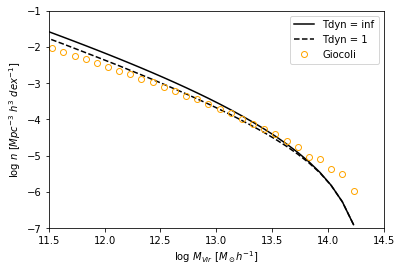

In [5]:
z = 0.5

#from the model
usSHMF_Data = np.loadtxt("./Subhalos/Surviving_Subhalosinf.dat")
HaloMassRange_1 = usSHMF_Data[0,1:]
usSHMF_z = usSHMF_Data[:,0]
z_Bin = np.digitize(z, usSHMF_z)
sSHMF_1_z = usSHMF_Data[z_Bin,1:]

plt.plot(HaloMassRange_1, np.log10(sSHMF_1_z), "-k", label = "Tdyn = inf")

usSHMF_Data = np.loadtxt("./Subhalos/Surviving_Subhalos1.0.dat")
HaloMassRange_tdyn1 = usSHMF_Data[0,1:]
usSHMF_z = usSHMF_Data[:,0]
z_Bin = np.digitize(z, usSHMF_z)
usSHMF_tdyn1_z = usSHMF_Data[z_Bin,1:]
plt.plot(HaloMassRange_tdyn1, np.log10(usSHMF_tdyn1_z), "--k", label = "Tdyn = 1")

"""
#from doing it analytically
Range = HaloMassRange_1
Result = np.array([F1(m, 0.1, z = z)[0] for m in Range])#+np.log10(h**3)
plt.plot(Range, Result, "--", label = "Analytic")
"""

#from Giocoli cat
hist, edges = np.histogram(FS_Sat_05+np.log10(h), bins = HaloMassRange_1[24:])
hist = np.log10(np.divide(hist, ((500*h)**3)*HM_Bin))[1:]
plt.plot(edges[2:], hist, "o", color = "orange", fillstyle='none',label = "Giocoli")

plt.ylim(-7, -1)
plt.xlim(11.5, 14.5)
plt.legend()

plt.ylabel('$\log\ n\ [Mpc^{-3}\ h^3\ dex^{-1}]$')
plt.xlabel('$\log\ M_{Vir}\ [M_\odot h^{-1}]$')
plt.show()

/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


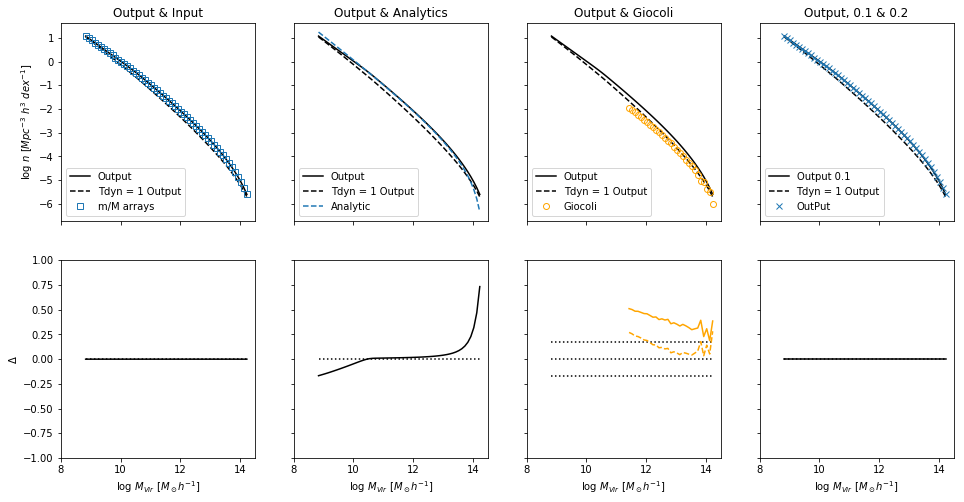

In [6]:
f, SubPlots = plt.subplots(2, 4, figsize = (16,8), sharey = 'row', sharex = True)

#from the model
usSHMF_Data = np.loadtxt("./Subhalos/Surviving_Subhalosinf.dat")
HaloMassRange_1 = usSHMF_Data[0,1:]
usSHMF_1 = usSHMF_Data[1,1:]
SubPlots[0][0].plot(HaloMassRange_1, np.log10(usSHMF_1), "-k", label = "Output")
SubPlots[0][1].plot(HaloMassRange_1, np.log10(usSHMF_1), "-k", label = "Output")
SubPlots[0][2].plot(HaloMassRange_1, np.log10(usSHMF_1), "-k", label = "Output")
SubPlots[0][3].plot(HaloMassRange_1, np.log10(usSHMF_1), "-k", label = "Output 0.1")

usSHMF_Data = np.loadtxt("./Subhalos/Surviving_Subhalos1.0.dat")
HaloMassRange_tdyn1 = usSHMF_Data[0,1:]
usSHMF_tdyn1 = usSHMF_Data[1,1:]
SubPlots[0][0].plot(HaloMassRange_tdyn1, np.log10(usSHMF_tdyn1), "--k", label = "Tdyn = 1 Output")
SubPlots[0][1].plot(HaloMassRange_tdyn1, np.log10(usSHMF_tdyn1), "--k", label = "Tdyn = 1 Output")
SubPlots[0][2].plot(HaloMassRange_tdyn1, np.log10(usSHMF_tdyn1), "--k", label = "Tdyn = 1 Output")
SubPlots[0][3].plot(HaloMassRange_tdyn1, np.log10(usSHMF_tdyn1), "--k", label = "Tdyn = 1 Output")

"""
usSHMF_Data = np.loadtxt("./Subhalos/Surviving_Subhalos_Stripped1.00.1.dat")
HaloMassRange_tdyn1_s = usSHMF_Data[0,1:]
usSHMF_tdyn1_s = usSHMF_Data[1,1:]
SubPlots[0][0].plot(HaloMassRange_tdyn1_s, np.log10(usSHMF_tdyn1_s), ":k", label = "Tdyn = 1 Stripped")
SubPlots[0][1].plot(HaloMassRange_tdyn1_s, np.log10(usSHMF_tdyn1_s), ":k", label = "Tdyn = 1 Stripped")
SubPlots[0][2].plot(HaloMassRange_tdyn1_s, np.log10(usSHMF_tdyn1_s), ":k", label = "Tdyn = 1 Stripped")
SubPlots[0][3].plot(HaloMassRange_tdyn1_s, np.log10(usSHMF_tdyn1_s), ":k", label = "Tdyn = 1 Stripped")
"""

#From the model setup
SHMF_Entering = np.load("MasterArr/SHMFs_Entering_11.015.00.10.6774.npy")
a, b, c = SHMF_Entering.shape
AnalyticHaloMass_min = 11.0; AnalyticHaloMass_max = 15.0; AnalyticHaloBin = 0.1
AnalyticHaloMass = np.arange(AnalyticHaloMass_min + np.log10(h), AnalyticHaloMass_max + np.log10(h), AnalyticHaloBin)
SatHaloMass = np.arange(AnalyticHaloMass_min-2 + np.log10(h), AnalyticHaloMass_max-0.5 + np.log10(h), AnalyticHaloBin)
HMF = (HMF_fun(AnalyticHaloMass, 0))*AnalyticHaloBin
HMF_c = (np.array([HMF for i in range(c)]).T)

#Units are Mvir h-1
Totals_z = []
for i in range(a):
    Totals_z.append(np.sum(np.multiply(SHMF_Entering[i], HMF_c), axis = 0))
Totals_z = np.array(Totals_z)
uSHMF = np.sum(Totals_z, axis = 0)
SubPlots[0][0].plot(SatHaloMass, np.log10(uSHMF), "s",fillstyle='none',label = "m/M arrays")

#from the model
usSHMF_Data = np.loadtxt("./Subhalos/Surviving_Subhalosinf.dat")
HaloMassRange_2 = usSHMF_Data[0,1:]
usSHMF_2 = usSHMF_Data[1,1:]
SubPlots[0][3].plot(HaloMassRange_2, np.log10(usSHMF_2), "x", label = "OutPut")

#from doing it analytically
Range = HaloMassRange_1
Result = np.array([F1(m, 0.1)[0] for m in Range])#+np.log10(h**3)
SubPlots[0][1].plot(Range, Result, "--", label = "Analytic")

#from Giocoli cat
hist, edges = np.histogram(FS_Sat+np.log10(h), bins = HaloMassRange_1[24:])
hist = np.log10(np.divide(hist, ((500*h)**3)*HM_Bin))[1:]
SubPlots[0][2].plot(edges[2:], hist, "o", color = "orange", fillstyle='none',label = "Giocoli")

#plt.plot(AnalyticHaloMass,np.log10(HMF), label =  "HMF")
plt.xlim(8, 14.5)
plt.legend()

SubPlots[1][0].set_ylim(-1, 1)

SubPlots[1][0].plot(HaloMassRange_1, np.log10(usSHMF_1) - np.log10(uSHMF), "k")
SubPlots[0][0].set_title("Output & Input")

SubPlots[1][1].plot(HaloMassRange_1, np.log10(usSHMF_1) - Result, "k")
SubPlots[0][1].set_title("Output & Analytics")

SubPlots[1][2].plot(HaloMassRange_1[26:], np.log10(usSHMF_1)[26:] - hist, "-", color = "orange")
SubPlots[1][2].plot(HaloMassRange_tdyn1[26:], np.log10(usSHMF_tdyn1)[26:] - hist, "--", color = "orange")
#SubPlots[1][2].plot(HaloMassRange_tdyn1[26:], np.log10(usSHMF_tdyn1_s)[26:] - hist, ":", color = "orange")
SubPlots[0][2].set_title("Output & Giocoli")

M2 = np.array([np.any(HaloMassRange_2 == i) for i in HaloMassRange_1])
SubPlots[1][3].plot(HaloMassRange_1[M2], np.log10(usSHMF_1[M2]) - np.log10(usSHMF_2), "k")
SubPlots[0][3].set_title("Output, 0.1 & 0.2")



SubPlots[0][0].set_ylabel('$\log\ n\ [Mpc^{-3}\ h^3\ dex^{-1}]$')
SubPlots[1][0].set_ylabel('$\Delta$')
SubPlots[0][0].legend(loc = 3)
SubPlots[0][1].legend(loc = 3)
SubPlots[0][2].legend(loc = 3)
SubPlots[0][3].legend(loc = 3)
SubPlots[1][0].set_xlabel('$\log\ M_{Vir}\ [M_\odot h^{-1}]$')
SubPlots[1][1].set_xlabel('$\log\ M_{Vir}\ [M_\odot h^{-1}]$')
SubPlots[1][2].set_xlabel('$\log\ M_{Vir}\ [M_\odot h^{-1}]$')
SubPlots[1][3].set_xlabel('$\log\ M_{Vir}\ [M_\odot h^{-1}]$')
#SubPlots[1][2].hlines(y=np.log10(h**3), xmin=np.min(HaloMassRange_1), xmax=np.max(HaloMassRange_1), colors = 'k')
#SubPlots[1][2].hlines(y=-np.log10(h**3), xmin=np.min(HaloMassRange_1), xmax=np.max(HaloMassRange_1), colors = 'k')
SubPlots[1][2].hlines(y=np.log10(h), xmin=np.min(HaloMassRange_1), xmax=np.max(HaloMassRange_1), linestyles =  ':', colors = 'k')
SubPlots[1][2].hlines(y=-np.log10(h), xmin=np.min(HaloMassRange_1), xmax=np.max(HaloMassRange_1), linestyles =  ':', colors = 'k')
SubPlots[1][0].hlines(y=0, xmin=np.min(HaloMassRange_1), xmax=np.max(HaloMassRange_1), linestyles =  ':', colors = 'k')
SubPlots[1][1].hlines(y=0, xmin=np.min(HaloMassRange_1), xmax=np.max(HaloMassRange_1), linestyles =  ':', colors = 'k')
SubPlots[1][2].hlines(y=0, xmin=np.min(HaloMassRange_1), xmax=np.max(HaloMassRange_1), linestyles =  ':', colors = 'k')
SubPlots[1][3].hlines(y=0, xmin=np.min(HaloMassRange_1), xmax=np.max(HaloMassRange_1), linestyles =  ':', colors = 'k')
plt.show()

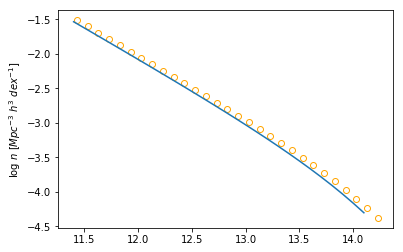

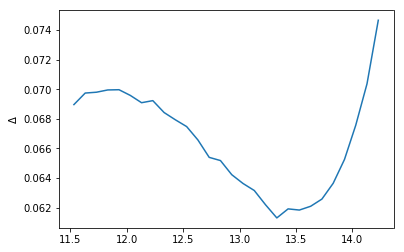

In [7]:
head_cen = ['M200c', 'M200b', 'Mvir']
FS_Cat_Cen = pd.read_csv('./Francesco_Cat/ForPip_z0.0h0.678om0.307_Cen 0.0200cVir_Vol500.dat', delim_whitespace=True, names = head_cen)
FS_Cen = np.array(FS_Cat_Cen.M200c)
#from Giocoli cat
hist, edges = np.histogram(FS_Cen+np.log10(h), bins = HaloMassRange_1[24:])
hist = np.log10(np.divide(hist, ((500*h)**3)*HM_Bin) )[1:]

HMF_fit = hmf.fitting_functions.Tinker10
HMF_interp = hmf.MassFunction(Mmin=11.4, Mmax = 14.2, dlog10m=HM_Bin, hmf_model=HMF_fit, delta_h=200.0, delta_wrt='crit', delta_c=1.686)
HMF_HMF = np.log10(HMF_interp.dndlog10m)
HMF_HMF_m = np.log10(HMF_interp.m)
plt.ylabel('$\log\ n\ [Mpc^{-3}\ h^3\ dex^{-1}]$')
plt.plot(edges[2:], hist, "o", color = "orange", fillstyle='none',label = "Giocoli")
plt.plot(HMF_HMF_m, HMF_HMF)
plt.show()

plt.plot(edges[3:], HMF_HMF-hist[1:])
plt.ylabel('$\Delta$')
plt.show()

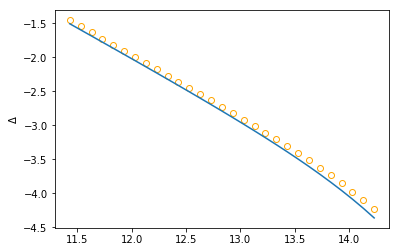

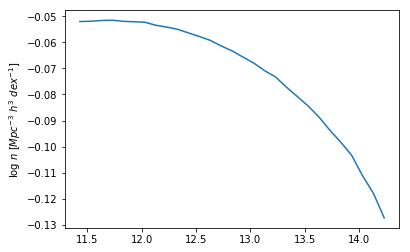

In [8]:
head_cen = ['M200c', 'MM200b', 'Mvir']
FS_Cat_Cen = pd.read_csv('./Francesco_Cat/ForPip_z0.0h0.678om0.307_Cen 0.0200cVir_Vol500.dat', delim_whitespace=True, names = head_cen)
FS_Cen = np.array(FS_Cat_Cen.Mvir)
#from Giocoli cat
hist, edges = np.histogram(FS_Cen+np.log10(h), bins = HaloMassRange_1[24:])
hist = np.log10(np.divide(hist, ((500*h)**3)*HM_Bin) )[1:]

HMF_HMF = np.log10(HMF_fun(edges[2:], 0))

plt.ylabel('$\Delta$')
plt.plot(edges[2:], hist, "o", color = "orange", fillstyle='none',label = "Giocoli")
plt.plot(edges[2:], HMF_HMF)
plt.show()

plt.plot(edges[2:], HMF_HMF-hist)
plt.ylabel('$\log\ n\ [Mpc^{-3}\ h^3\ dex^{-1}]$')
plt.show()

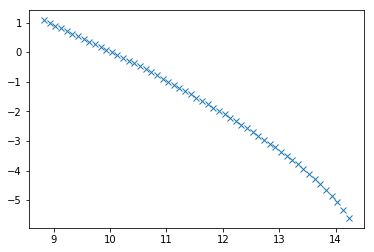

In [9]:
#From the model setup
SHMF_Entering = np.load("./MasterArr/SHMFs_Entering_11.015.00.10.6774.npy")
a, b, c = SHMF_Entering.shape

AnalyticHaloMass_min = 11.0; AnalyticHaloMass_max = 15.0; AnalyticHaloBin = 0.1
AnalyticHaloMass = np.arange(AnalyticHaloMass_min + np.log10(h), AnalyticHaloMass_max + np.log10(h), AnalyticHaloBin)
SatHaloMass = np.arange(AnalyticHaloMass_min-2 + np.log10(h), AnalyticHaloMass_max-0.5 + np.log10(h), AnalyticHaloBin)

HMF = (HMF_fun(AnalyticHaloMass, 0))*AnalyticHaloBin
HMF_c = (np.array([HMF for i in range(c)]).T)

#Units are Mvir h-1
Totals_z = []
for i in range(a):
    Totals_z.append(np.sum(np.multiply(SHMF_Entering[i], HMF_c), axis = 0))
Totals_z = np.array(Totals_z)
uSHMF = np.sum(Totals_z, axis = 0)
plt.plot(SatHaloMass, np.log10(uSHMF), "x",label = "m/M 0.1")

"""
#From the model setup
SHMF_Entering = np.load("./MasterArr/SHMFs_Entering_11.015.00.20.6774.npy")
a, b, c = SHMF_Entering.shape
AnalyticHaloMass_min = 11.0; AnalyticHaloMass_max = 15.0; AnalyticHaloBin = 0.2
AnalyticHaloMass = np.arange(AnalyticHaloMass_min + np.log10(h), AnalyticHaloMass_max + np.log10(h), AnalyticHaloBin)
SatHaloMass = np.arange(AnalyticHaloMass_min-2 + np.log10(h), AnalyticHaloMass_max-0.5 + np.log10(h), AnalyticHaloBin)
HMF = (HMF_fun(AnalyticHaloMass, 0))*AnalyticHaloBin
HMF_c = (np.array([HMF for i in range(c)]).T)

#Units are Mvir h-1
Totals_z = []
for i in range(a):
    Totals_z.append(np.sum(np.multiply(SHMF_Entering[i], HMF_c), axis = 0))
Totals_z = np.array(Totals_z)
uSHMF = np.sum(Totals_z, axis = 0)
plt.plot(SatHaloMass, np.log10(uSHMF), "x",label = "m/M 0.2")

#From the model setup
SHMF_Entering = np.load("./MasterArr/SHMFs_Entering_11.015.00.50.6774.npy") #N dex-1
a, b, c = SHMF_Entering.shape
AnalyticHaloMass_min = 11.0; AnalyticHaloMass_max = 15.0; AnalyticHaloBin = 0.5
AnalyticHaloMass = np.arange(AnalyticHaloMass_min + np.log10(h), AnalyticHaloMass_max + np.log10(h), AnalyticHaloBin)
SatHaloMass = np.arange(AnalyticHaloMass_min-2 + np.log10(h), AnalyticHaloMass_max-0.5 + np.log10(h), AnalyticHaloBin)

HMF = (HMF_fun(AnalyticHaloMass, 0))*AnalyticHaloBin #N Mpc_3 h^3
HMF_c = (np.array([HMF for i in range(c)]).T) #N Mpc_3 h^3

#Units are Mvir h-1
Totals_z = []
for i in range(a):
    Totals_z.append(np.sum(np.multiply(SHMF_Entering[i], HMF_c), axis = 0)) 
Totals_z = np.array(Totals_z) #N Mpc^-3 h^3 dex-1
uSHMF = np.sum(Totals_z, axis = 0) #N Mpc^-3 h^3 dex-1
plt.plot(SatHaloMass, np.log10(uSHMF), "x",label = "m/M 0.5" )
"""

plt.show()


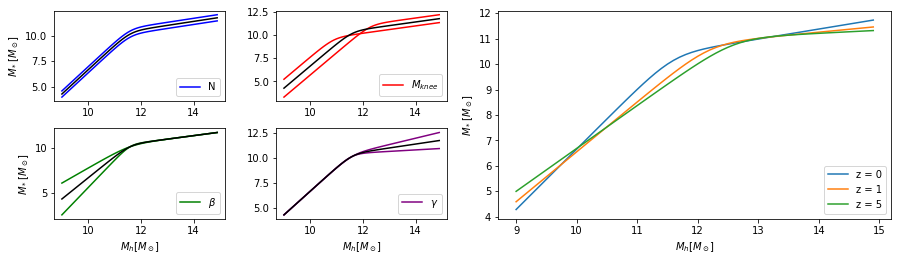

In [3]:
AbnMtch =\
{\
'UseBehroozi': False,\
'Behroozi13': False,\
'Lorenzo18':False,\
'Kravtsov13':False,\
'UseMoster':True,\
'Buchan16': False,\
'Moster': False,\
'UseSF': False,\
'Override_0': False,\
'Override_z': True,\
'z_Evo':True,\
'M10':11.59,\
'SHMnorm10':0.0351,\
'beta10':1.376,\
'gamma10':0.608,\
'M11':1.195,\
'SHMnorm11':-0.0247,\
'beta11':-0.826,\
'gamma11':0.329,\
'Scatter_OR':False,\
'Scatter': None\
}
Paramaters = \
{\
'AbnMtch' : AbnMtch,\
'AltDynamicalTime': 1\
}

#f, SubPlots = plt.subplots(1, 2, figsize = (15,4.5), sharey = 'row', sharex = True)
Redshifts = [0,1,5]
Rel_Param = ["N", r"$M_{knee}$", r"$\beta$", r"$\gamma$"]
Rel_Param_Key = ['SHMnorm10', 'M10', 'beta10', 'gamma10']
Colours = ["b", "r", "g", "purple"]
X = np.arange(9, 15, 0.1)

fig = plt.figure(figsize = (15,6))
gs = gridspec.GridSpec(3, 4)


ax1 = fig.add_subplot(gs[0,0:1])
i = 0
key = Rel_Param_Key[i]
SaveParam = AbnMtch[key]

AbnMtch[key] = SaveParam*2
Y = DarkMatterToStellarMass(X, 0, Paramaters)
ax1.plot(X,Y, color = Colours[i])

AbnMtch[key] = SaveParam*0.5
Y = DarkMatterToStellarMass(X, 0, Paramaters)
ax1.plot(X,Y, color = Colours[i], label = Rel_Param[i])
AbnMtch[key] = SaveParam
Y = DarkMatterToStellarMass(X, 0, Paramaters)
ax1.plot(X,Y, "k")
ax1.legend(loc = 4)
ax1.set_ylabel(r"$M_* [M_\odot]$")

ax2 = fig.add_subplot(gs[0,1:2])
i = 1
key = Rel_Param_Key[i]
SaveParam = AbnMtch[key]

AbnMtch[key] = SaveParam*1.06
Y = DarkMatterToStellarMass(X, 0, Paramaters)
ax2.plot(X,Y, color = Colours[i])

AbnMtch[key] = SaveParam*0.94
Y = DarkMatterToStellarMass(X, 0, Paramaters)
ax2.plot(X,Y, color = Colours[i], label = Rel_Param[i])
AbnMtch[key] = SaveParam
Y = DarkMatterToStellarMass(X, 0, Paramaters)
ax2.plot(X,Y, "k")
ax2.legend(loc = 4)

ax3 = fig.add_subplot(gs[1,0:1])
i = 2
key = Rel_Param_Key[i]
SaveParam = AbnMtch[key]

AbnMtch[key] = SaveParam*1.5
Y = DarkMatterToStellarMass(X, 0, Paramaters)
ax3.plot(X,Y, color = Colours[i])

AbnMtch[key] = SaveParam*0.5
Y = DarkMatterToStellarMass(X, 0, Paramaters)
ax3.plot(X,Y, color = Colours[i], label = Rel_Param[i])
AbnMtch[key] = SaveParam
Y = DarkMatterToStellarMass(X, 0, Paramaters)
ax3.plot(X,Y, "k")
ax3.legend(loc = 4)
ax3.set_ylabel(r"$M_* [M_\odot]$")
ax3.set_xlabel(r"$M_h [M_\odot]$")

ax4 = fig.add_subplot(gs[1,1:2])
i = 3
key = Rel_Param_Key[i]
SaveParam = AbnMtch[key]

AbnMtch[key] = SaveParam*1.4
Y = DarkMatterToStellarMass(X, 0, Paramaters)
ax4.plot(X,Y, color = Colours[i])

AbnMtch[key] = SaveParam*0.6
Y = DarkMatterToStellarMass(X, 0, Paramaters)
ax4.plot(X,Y, color = Colours[i], label = Rel_Param[i])
AbnMtch[key] = SaveParam
Y = DarkMatterToStellarMass(X, 0, Paramaters)
ax4.plot(X,Y, "k")
ax4.legend(loc = 4)
ax4.set_xlabel(r"$M_h [M_\odot]$")

ax5 = fig.add_subplot(gs[0:2,2:])
for i in Redshifts:
    ax5.plot(X,DarkMatterToStellarMass(X, i, Paramaters), label = "z = {}".format(i))
ax5.legend(loc = 4)
ax5.set_ylabel(r"$M_* [M_\odot]$")
ax5.set_xlabel(r"$M_h [M_\odot]$")
gs.update(wspace=0.3, hspace=0.3)
#plt.tight_layout()
plt.show()

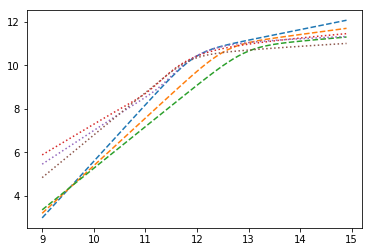

In [7]:
#Abundance Matching Parameters
AbnMtch =\
{\
'UseRP': False,\
'UseBehroozi': True,\
'Behroozi13': True,\
'Lorenzo18':False,\
'UseMoster': False,\
'Moster': False,\
'Moster17': False,\
'Override_0': False,\
'Override_z': True,\
'z_Evo':True,\
'M10':None,\
'SHMnorm10':None,\
'beta10':None,\
'gamma10':None,\
'M11':1.195,\
'SHMnorm11':-0.0247,\
'beta11':-0.826,\
'gamma11':0.329,\
'Scatter_OR':True,\
'Scatter': None\
}


if True:
    #Cent_only11.80, 0.032, 1.90, 0.54, 0.13
    AbnMtch['M10'], AbnMtch['SHMnorm10'], AbnMtch['beta10'], AbnMtch['gamma10'], AbnMtch['Scatter'] = 11.95,   0.025,   1.6,   0.52,   0.1


Paramaters = \
{\
'AbnMtch' : AbnMtch,\
'AltDynamicalTime': 1\
}

